# 5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. Это задание будет не то чтобы про линейную регрессию, но про попытку построить модель для предсказания цен на дом. В принципе я бы мог еще добавить заданий на более тщательный отбор признаков, логарифмирование признаков, у которых сильное смещение "скоса"(skew). Можно было бы анализировать и выпрямлять распределение целевой переменной. Можно было бы генерировать новые признаки из существующих, строить ансамбли моделей. Но мы ограничимся, пока что.......

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
colab = False 
if colab:
    from google.colab import drive
    drive.mount('/content/drive/')

In [3]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/house_prices.csv.gz', index_col='Id')
else:
    df = pd.read_csv('../../../../data/house_prices.csv.gz', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 80)

In [5]:
assert df.shape == (1460, 80)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределение или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регрессии через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание: 
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

In [8]:
from scipy.stats import norm,kurtosis,probplot

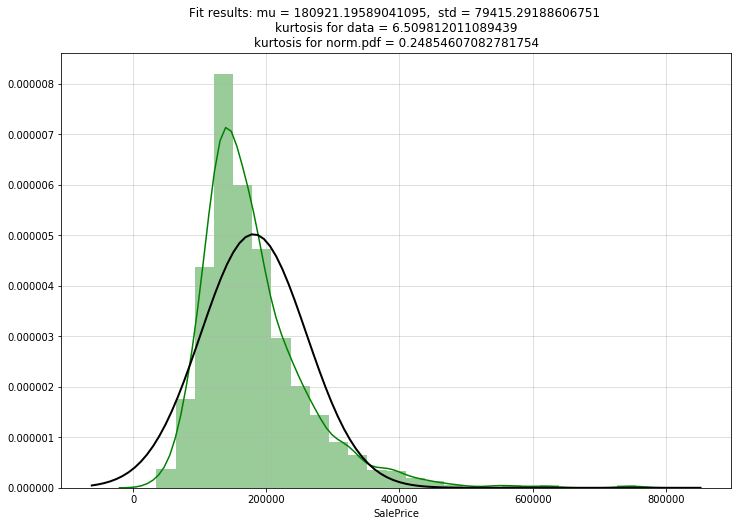

In [196]:
fsize = (12, 8)
fig, ax = plt.subplots(figsize=fsize)    
plt.grid(alpha=0.5)

# Fit a normal distribution to the data:
mu, std = norm.fit(df.SalePrice) #Математическое ожидание и стандартное отклонение

# Plot the histogram.
#plt.hist(df.SalePrice, bins=25, density=True, alpha=0.6, color='g')
sns.distplot(df.SalePrice, bins=25, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = {},  std = {} \nkurtosis for data = {}\nkurtosis for norm.pdf = {}".format(mu, std,kurtosis(df.SalePrice),kurtosis(p))
plt.title(title)

plt.show()

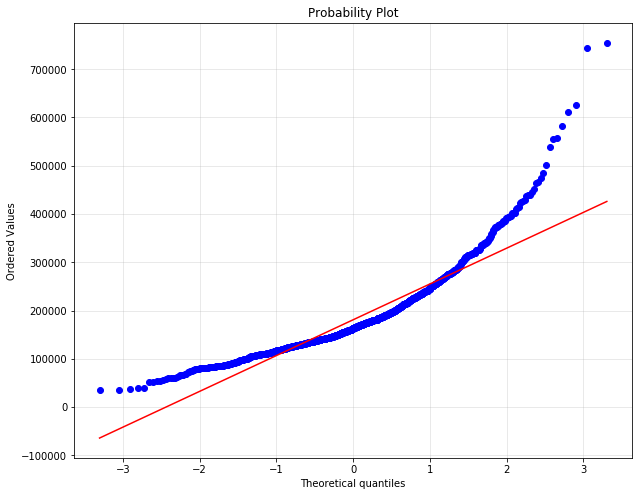

In [201]:
fsize = (10, 8)
fig, ax = plt.subplots(figsize=fsize)    
plt.grid(alpha=0.35)
plt.yticks(range(-100000,1000000,100000))
probplot(df.SalePrice, plot=plt);

Отклонения от прямой предполагают отклонения от нормального распределения

??? Выбросы на -3 и 3 лучше убрать или оставить?

Интересно, а совпадает ли этот график с текущим распределением целевого признака? Что означают места пересечения с красной линией?

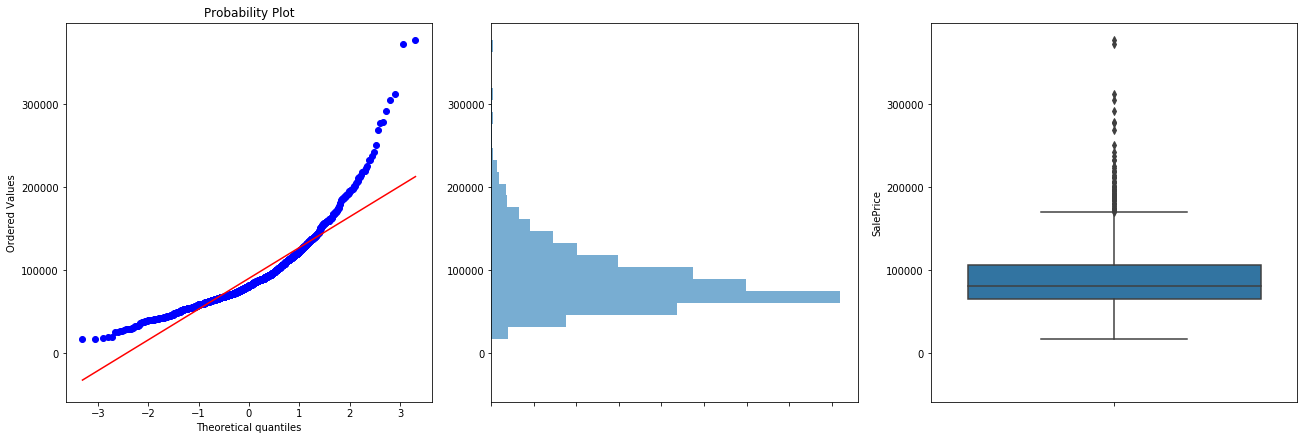

In [13]:
# Create Fig and gridspec
fig = plt.figure(figsize=(18, 6), constrained_layout=True)
#plt.grid(alpha=0.35)
#plt.yticks(range(-100000,1000000,100000))
yticks = range(-100000,1000000,100000)

grid = plt.GridSpec(1, 3, hspace=0.2, wspace=0.2, figure=fig)

ax_main = fig.add_subplot(grid  [0, 0], yticklabels=yticks)
ax_middle = fig.add_subplot(grid[0, 1:2],  xticklabels=[],  yticklabels=yticks)
ax_right = fig.add_subplot(grid [0, 2],  xticklabels=[], yticklabels=yticks)

probplot(df.SalePrice, plot=ax_main)
sns.boxplot(df.SalePrice, ax=ax_right, orient="v")
ax_middle.hist(df.SalePrice, bins=25, density=True, alpha=0.6, orientation='horizontal')

ax_main .plot(0, -75000, linewidth=2, markersize=12)
ax_right.plot(0, -75000, linewidth=2, markersize=12)
ax_middle.plot(0, -75000, linewidth=2, markersize=12)


plt.show()

## 1.1 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

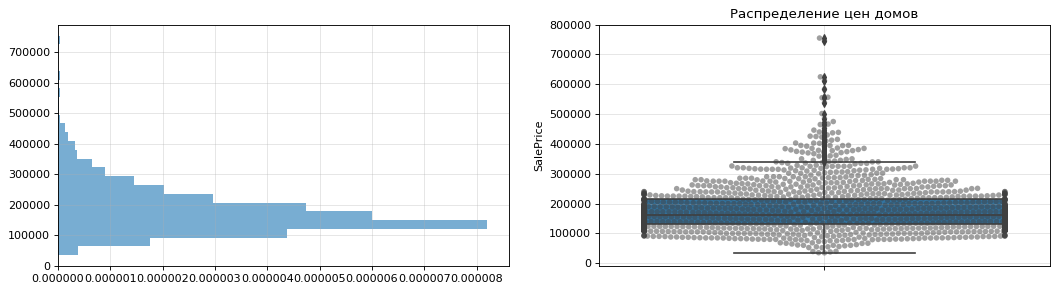

In [19]:
fig = plt.figure(figsize=(16, 4), dpi= 80)
grid = plt.GridSpec(1, 2, hspace=0.2, wspace=0.2)

ax_main = fig.add_subplot(grid  [0, 0])
ax_right = fig.add_subplot(grid[0, 1])

#sns.violinplot(y=df['SalePrice'], palette="Blues",inner="quartile",linewidth=0.5,ax=ax_right)
sns.boxplot(y=df['SalePrice'],ax=ax_right)
sns.swarmplot(y='SalePrice', data=df, color=".25", edgecolor="gray", alpha=0.5)

ax_main.hist(df['SalePrice'], bins=25, density=True, alpha=0.6, orientation='horizontal')

ax_main.grid(alpha=0.35)
ax_right.grid(alpha=0.35)

plt.title('Распределение цен домов');
plt.show()

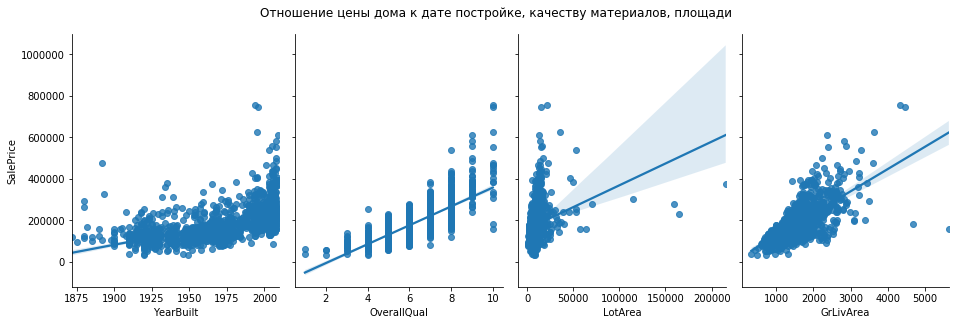

In [211]:

g=sns.pairplot(df, x_vars=["YearBuilt", "OverallQual", "LotArea","GrLivArea"], y_vars=["SalePrice"], aspect=.8, kind="reg", height=4);
g.fig.suptitle("Отношение цены дома к дате постройке, качеству материалов, площади", y=1.08);

##### дата постройки дома и его стоимость

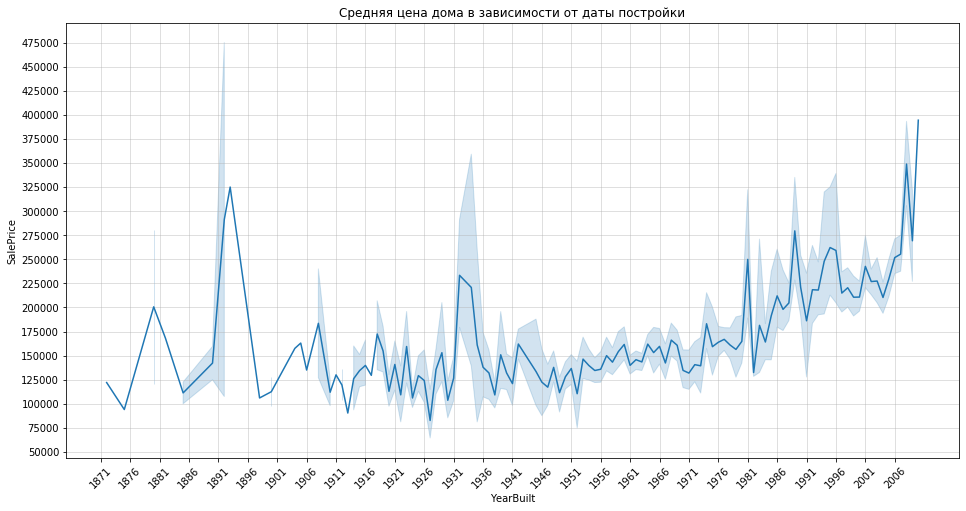

In [20]:
fsize = (16, 8)
fig, ax = plt.subplots(figsize=fsize)    
plt.xticks(range(1871,2011,5), rotation=45)
#plt.xticks(df['YearBuilt'])
plt.yticks(range(0,800000,25000))
plt.grid(alpha=0.5)
plt.title('Средняя цена дома в зависимости от даты постройки')
sns.lineplot(data=df, x='YearBuilt', y='SalePrice')

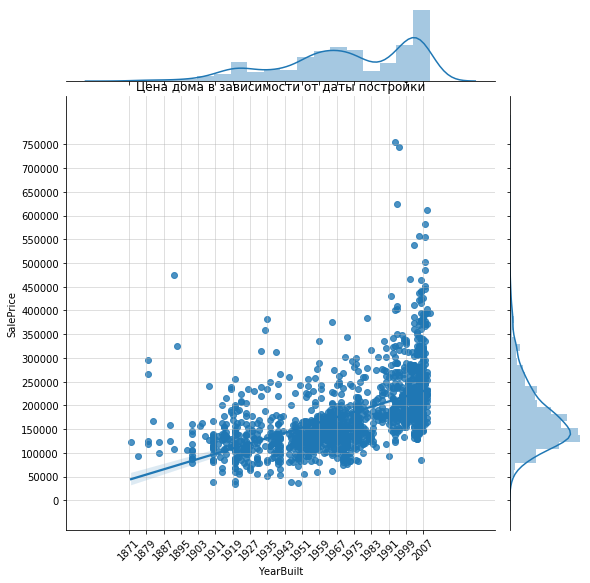

In [221]:
ax = sns.jointplot(data=df, x='YearBuilt', y='SalePrice', kind="reg", height=8)
plt.yticks(range(0,800000,50000))
plt.xticks(range(1871,2011,8), rotation=45)
plt.grid(alpha=0.5)
plt.title('Цена дома в зависимости от даты постройки');

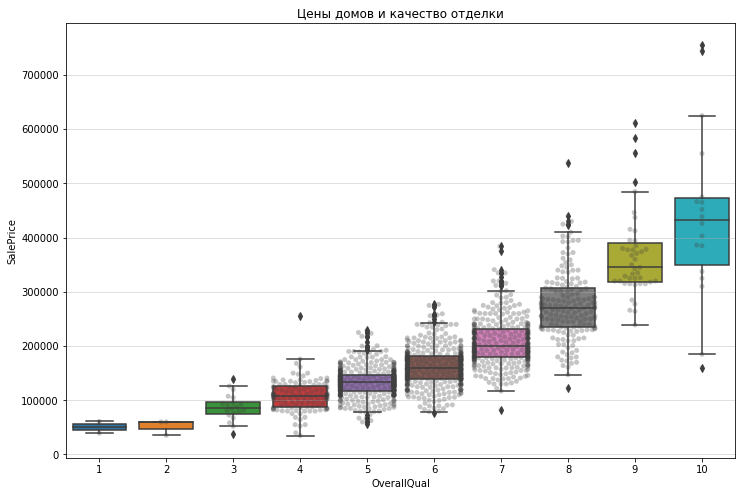

In [23]:
fsize = (12, 8)
fig, ax = plt.subplots(figsize=fsize)    
plt.grid(alpha=0.5)
plt.title('Цены домов и качество отделки')
sns.boxplot(data=df,y='SalePrice',x='OverallQual')
sns.swarmplot(y='SalePrice',x='OverallQual', data=df, color=".25", alpha=0.3)

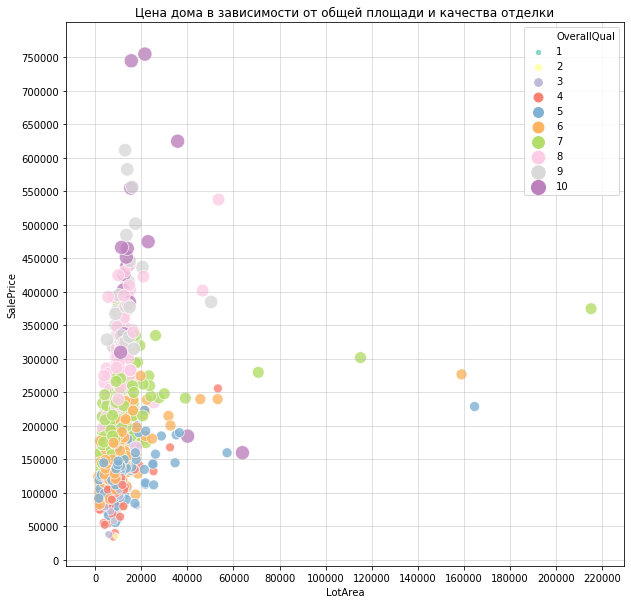

In [242]:
fsize = (10, 10)
fig, ax = plt.subplots(figsize=fsize)    
plt.yticks(range(0,800000,50000))
plt.xticks(range(0,300000,20000))
plt.grid(alpha=0.5)
plt.title('Цена дома в зависимости от общей площади и качества отделки')
sns.scatterplot(data=df, x='LotArea', y='SalePrice',hue='OverallQual', size='OverallQual',sizes=(20, 200),legend="full",palette="Set3",alpha=0.8)
pass

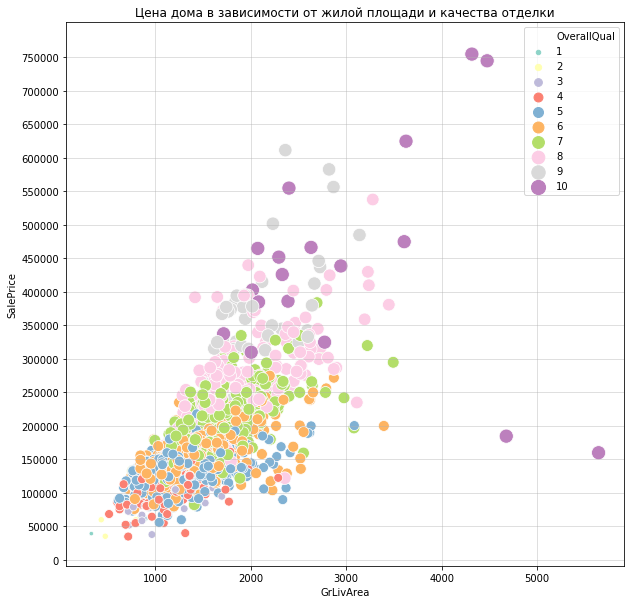

In [243]:
fsize = (10, 10)
fig, ax = plt.subplots(figsize=fsize)    
plt.yticks(range(0,800000,50000))
#plt.yticks(range(0,300000,20000))
plt.grid(alpha=0.5)
plt.title('Цена дома в зависимости от жилой площади и качества отделки')
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice',hue='OverallQual', size='OverallQual',sizes=(20, 200),legend="full",palette="Set3")
pass

## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

??? Как применять коэффициенты корреляции? Как быстро проверить распределение всех признаков? Если половина распределена нормально а половина нет?

method{‘pearson’, ‘kendall’, ‘spearman’} 

оценка нормальности распределения переменных: формальные тесты (Шапиро– Уилка, Андерсона – Дарлинга) и графики (квантильная диаграмма,гистограмма или диаграмма плотности)

- коэффициент корреляции Пирсона измеряющий линейную зависимость между двумя переменными и основан на следующих важных допущениях:
    - анализируемые переменные распределены нормально
    - переменные являются количественными и непрерывными
    - как минимум один из признаков имеет нормальное распределение;
    - связь между этими переменными линейна
    - гомоскедастичность (вариабельность однойпеременной не зависит от значений другой переменной)
    - переменные не зависимы
    - парность наблюдений (признак x и признак yотносятся к одним и тем же случаям)
    - достаточный объем выборки, включающий как минимум 25 наблюдений
    - для адекватной проекции расчетов на генеральную совокупность выборка должна быть репрезентативной

    Если распределение не нормальное, то можно попробовать логарифмировать переменные
    

- для ненормально распределенных переменных, а также при наличии нелинейной связи между переменными, следует использовать непараметрический коэффициент корреляции Спирмена. Этот вариант коэффициента корреляции работает не с исходными значениями переменных, а с их рангами, в связи с этим любое преобразование исходных данных никак не сказывается на его значении.


- Коэффициент ранговой корреляции Кендалла часто используют при анализе того, насколько хорошо согласуются результаты измерений, получаемые при помощи разных приборов, или результаты голосований экспертов по одному и тому же вопросу, и т.п.

In [27]:
corr = df.corr()

In [28]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

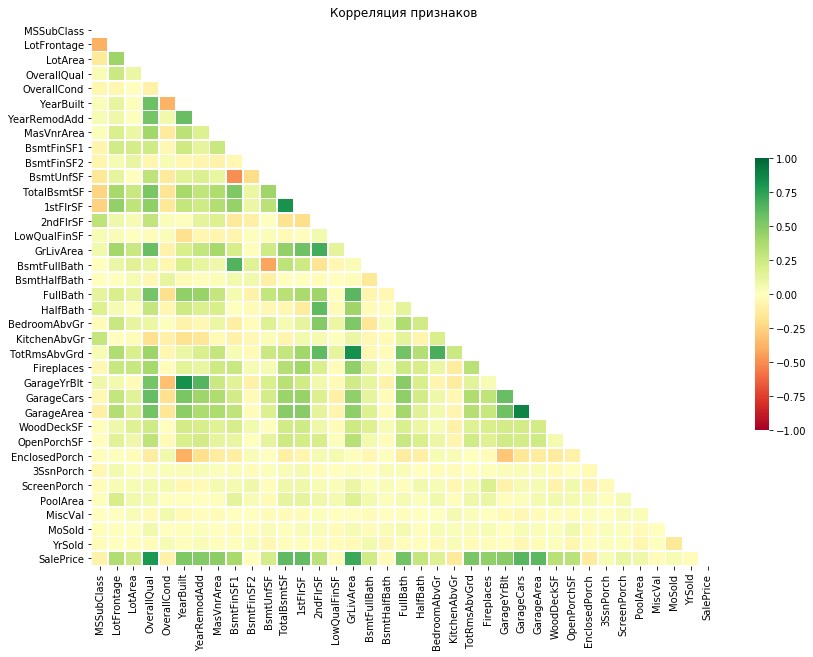

In [29]:
fsize = (14, 10)
fig, ax = plt.subplots(figsize=fsize)    
plt.grid(alpha=0.5)
plt.title('Корреляция признаков')
sns.heatmap(corr, mask=mask, cmap='RdYlGn', vmin=-1, vmax=1, center= 0,
            linewidths=0.7, cbar_kws={"shrink": .5});

Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной. 

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции. 
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

In [30]:
corr_threshold=0.5

corr = corr.abs()
corr_upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))# Select upper triangle of correlation matrix
columns_gt_threshold = [column for column in corr_upper.columns if any(corr_upper[column] > corr_threshold)]

In [31]:
columns_gt_threshold.insert(0, 'SalePrice')

In [348]:
columns_gt_threshold

['SalePrice',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [33]:
df_filtered = df[columns_gt_threshold]
mask_filtered = np.triu(np.ones_like(df_filtered.corr(), dtype=np.bool))

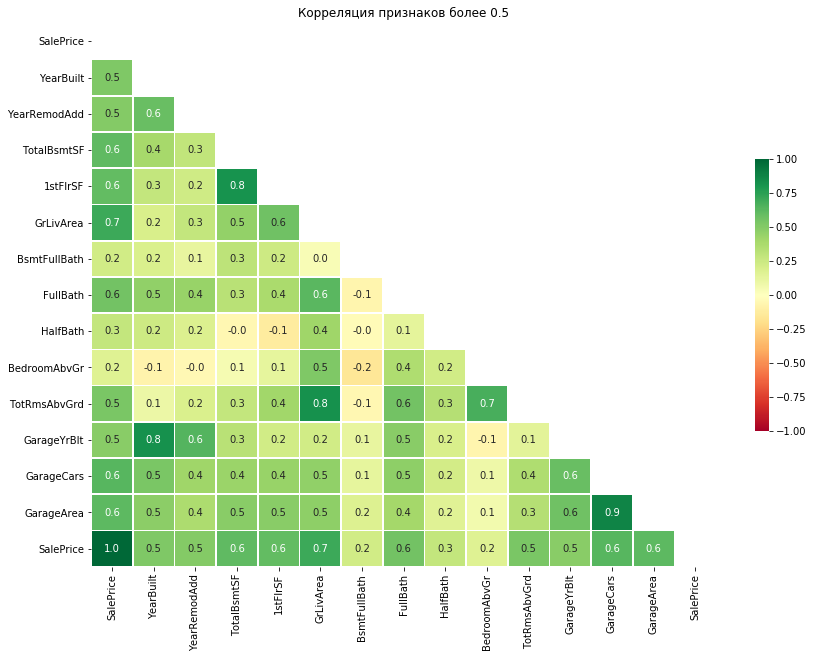

In [34]:
fsize = (14, 10)
fig, ax = plt.subplots(figsize=fsize)    
plt.grid(alpha=0.5)
plt.title('Корреляция признаков более {}'.format(corr_threshold))
sns.heatmap(df_filtered.corr(), mask=mask_filtered, cmap='RdYlGn', vmin=-1, vmax=1, center= 0,linewidths=0.7, cbar_kws={"shrink": .5},annot=True, fmt=".1f");

??? От какого порога нужно выкидывать как колинеарные? Или решается только регуляризацией?

## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больше 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hint: https://stackoverflow.com/a/38134049/3205200

#### общее количество пропущенных данных по каждому признаку

In [35]:
col_na = [col for col in df.columns if df[col].isnull().sum()>0]
df[col_na].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### доля пропущенных данных выборки

In [36]:
df[col_na].isnull().sum()/df[col_na].shape[0]*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

#### удаляю из выборки признаки, доля пропущенных которых больше 10%

In [37]:
na_threshold_perc = 10
list_col_na = (df[col_na].isnull().sum()/df[col_na].shape[0]*100 > na_threshold_perc).values

In [38]:
#индексы столбцов для удаления
col_index_to_drop = [i for i,col in enumerate(list_col_na) if col==True]
col_index_to_drop

[0, 1, 10, 16, 17, 18]

In [39]:
col_to_drop = df[col_na].columns[col_index_to_drop]
col_to_drop

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [40]:
df.drop(col_to_drop, axis=1,inplace=True)

#### пропущенные категориальные заполняю словом 'unknown'

In [41]:
#Столбы с пустыми значениями, без удаленных
col_na_after_drop = list(set(col_na) - set(col_to_drop))

In [42]:
col_na_after_drop_obj = df[col_na_after_drop].select_dtypes(include='object').columns
col_na_after_drop_obj

Index(['BsmtFinType1', 'GarageType', 'GarageFinish', 'Electrical',
       'BsmtFinType2', 'GarageQual', 'BsmtCond', 'MasVnrType', 'GarageCond',
       'BsmtExposure', 'BsmtQual'],
      dtype='object')

In [43]:
df[col_na_after_drop_obj].isnull().sum()

BsmtFinType1    37
GarageType      81
GarageFinish    81
Electrical       1
BsmtFinType2    38
GarageQual      81
BsmtCond        37
MasVnrType       8
GarageCond      81
BsmtExposure    38
BsmtQual        37
dtype: int64

In [44]:
df[col_na_after_drop_obj] = df[col_na_after_drop_obj].fillna('unknown')

??? Для чего так делается? Какие еще методы заполнения пропусков у категориальных значений?

In [45]:
df[col_na_after_drop_obj].isnull().sum()

BsmtFinType1    0
GarageType      0
GarageFinish    0
Electrical      0
BsmtFinType2    0
GarageQual      0
BsmtCond        0
MasVnrType      0
GarageCond      0
BsmtExposure    0
BsmtQual        0
dtype: int64

#### пропущенные числовые заполняю средним

In [46]:
col_na_after_drop_num = df[col_na_after_drop].select_dtypes(include=[np.number]).columns
col_na_after_drop_num

Index(['MasVnrArea', 'GarageYrBlt'], dtype='object')

In [47]:
df[col_na_after_drop_num].isnull().sum()

MasVnrArea      8
GarageYrBlt    81
dtype: int64

In [48]:
df[col_na_after_drop_num] = df[col_na_after_drop_num].fillna(df[col_na_after_drop_num].mean())

In [49]:
df[col_na_after_drop_num].isnull().sum()

MasVnrArea     0
GarageYrBlt    0
dtype: int64

## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [50]:
len(df.columns)

74

In [51]:
df_dum = pd.get_dummies(df)

??? Почему не 1 столбец и разные значения а много столбцов и 1/0?

??? Где граница категориального признака и числового? 

In [52]:
len(df_dum.columns)

281

In [252]:
from sklearn.utils import shuffle

In [356]:
df_dum = shuffle(df_dum, random_state=42)
X = df_dum.drop(['SalePrice'], axis=1)
y = df_dum['SalePrice']

In [357]:
print('X: {}, y: {}'.format(X.shape,y.shape))

X: (1460, 280), y: (1460,)


## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [251]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

В линейной регрессии используются взвешенные суммы признаков, поэтому все они должны быть одного масштаба. В нашем случае признаки разного масштаба:

In [260]:
pd.set_option('display.max_rows', None)

In [254]:
X.mean()

MSSubClass                  56.897260
LotArea                  10516.828082
OverallQual                  6.099315
OverallCond                  5.575342
YearBuilt                 1971.267808
YearRemodAdd              1984.865753
MasVnrArea                 103.685262
BsmtFinSF1                 443.639726
BsmtFinSF2                  46.549315
BsmtUnfSF                  567.240411
TotalBsmtSF               1057.429452
1stFlrSF                  1162.626712
2ndFlrSF                   346.992466
LowQualFinSF                 5.844521
GrLivArea                 1515.463699
BsmtFullBath                 0.425342
BsmtHalfBath                 0.057534
FullBath                     1.565068
HalfBath                     0.382877
BedroomAbvGr                 2.866438
KitchenAbvGr                 1.046575
TotRmsAbvGrd                 6.517808
Fireplaces                   0.613014
GarageYrBlt               1978.506164
GarageCars                   1.767123
GarageArea                 472.980137
WoodDeckSF  

In [255]:
#Стандартное отклонение и среднее до масштабирования
print(X.mean(axis=0).mean())
print(X.std(axis=0).mean())

87.63374383896407
51.14932531345336


In [256]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [257]:
#Теперь стандартное отклонение единично, а среднее близко к нулю
print(X.mean(axis=0).mean())
print(X.std(axis=0).mean())

1.7269834181974976e-16
1.0


In [358]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [359]:
df_lr_coef = pd.DataFrame({"coef_name":[],"coef_value":[]})
for coef, col in sorted(zip(lr.coef_, df_dum.columns), key=lambda x: np.abs(x[0]), reverse=True):
    df_lr_coef = df_lr_coef.append({"coef_name":col,"coef_value":np.round(coef, 2)}, ignore_index=True)

In [261]:
df_lr_coef

,coef_name,coef_value
0,LotConfig_Inside,4.568309e+17
1,LandSlope_Gtl,4.189845e+17
2,Heating_Wall,3.056621e+17
3,HeatingQC_Po,2.783106e+17
4,LandContour_Low,-2.705270e+17
5,PavedDrive_P,-2.357074e+17
6,HeatingQC_Fa,2.269752e+17
7,BsmtFinSF1,-2.113135e+17
8,GarageCond_unknown,-2.064010e+17
9,BsmtUnfSF,-2.047201e+17


##### Кросс-валидация

**среднее** ошибки предсказания на 5 фолдах

In [63]:
from sklearn.model_selection import cross_val_score

In [262]:
cv = 5 # проведем 5 экспериментов
errors = cross_val_score(LinearRegression(), X, y, cv=cv, scoring='neg_mean_squared_error')
print(errors)
error = abs(np.mean(errors))
print("\nerror = {:0.3f} \n  std = {:0.4f}".format(error, np.std(errors)))

[-1.45392374e+35 -7.24634704e+35 -2.30758208e+36 -1.89584943e+34
 -3.98938090e+34]

error = 647292292612899803190569110381527040.000 
  std = 869273701606008665609103159041458176.0000


In [349]:
np.sqrt(error)

33107.62550647991

??? У меня коэффициенты гораздо больше чем ниже в комментарие

К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [264]:
from sklearn.linear_model import Lasso, Ridge

In [360]:
alphas = np.arange(1, 500, 5)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

i = 0
for alpha in alphas:
    lasso = Lasso(alpha = alpha, random_state=42)
    lasso.fit(X, y)
    coefs_lasso[i, :] = lasso.coef_
    
    ridge = Ridge(alpha = alpha, random_state=42)
    ridge.fit(X, y)
    coefs_ridge[i, :] = ridge.coef_
    
    i += 1

/home/denis/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234895950341.91333, tolerance: 920791133.4609977
  positive)
/home/denis/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32062247813.03589, tolerance: 920791133.4609977
  positive)


In [353]:
np.argmax(coefs_lasso[-1,:])

14

In [355]:
df_dum.columns[14]

'GrLivArea'

Text(0.5, 1.0, 'Ridge')

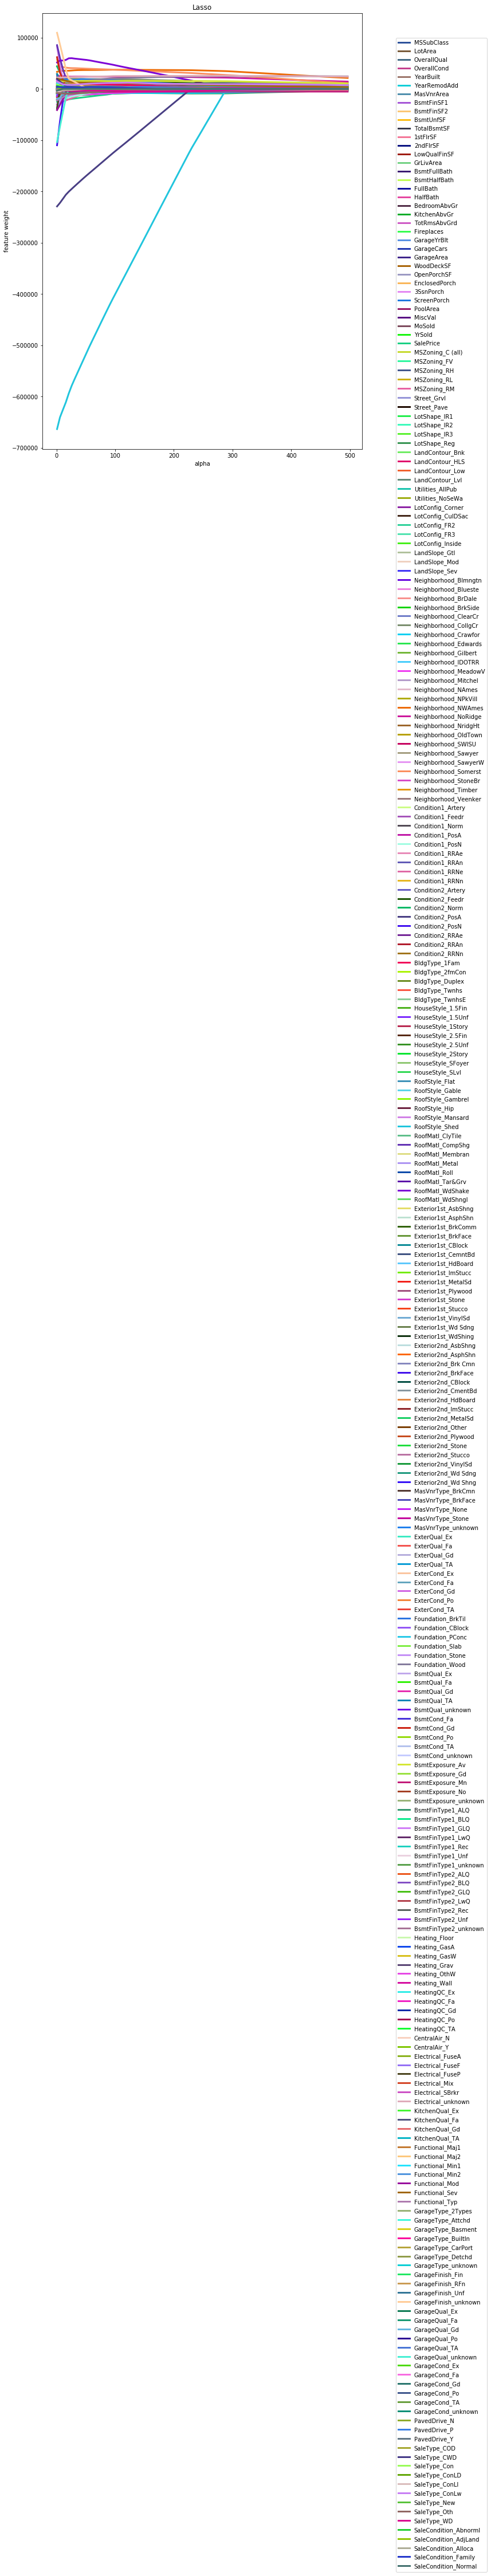

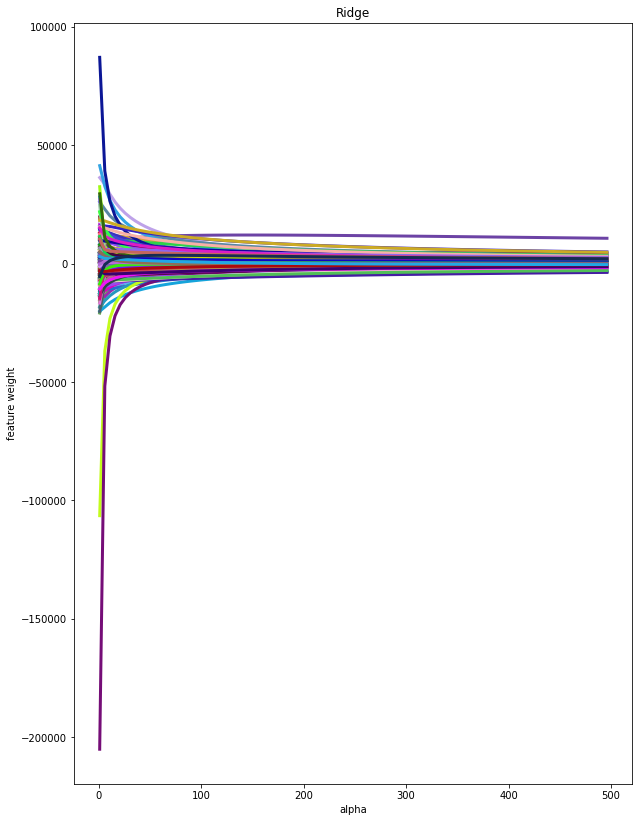

In [361]:
plt.figure(figsize=(10, 14))
for coef, feature in zip(coefs_lasso.T, df_dum.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(10, 14))
for coef, feature in zip(coefs_ridge.T, df_dum.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
#plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

??? Если зануление веса в Лоссо это борьба с колинеарностью, то что значит увеличение веса?

Гисторграмма, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

In [362]:
df_coefs_lasso_count_zero = pd.DataFrame({"alpha":[],"count_zero":[]})

for coef,alpha in zip(coefs_lasso.T,alphas):
    coef_count = len(coef[(coef>-0.0001) & (coef<0.0001)])
    df_coefs_lasso_count_zero = df_coefs_lasso_count_zero.append({"alpha":alpha,"count_zero":coef_count}, ignore_index=True)

(array([ 1.,  1.,  2.,  1.,  2.,  6.,  7.,  6., 31., 43.]),
 array([ 21. ,  41.2,  61.4,  81.6, 101.8, 122. , 142.2, 162.4, 182.6,
        202.8, 223. ]),
 <a list of 10 Patch objects>)

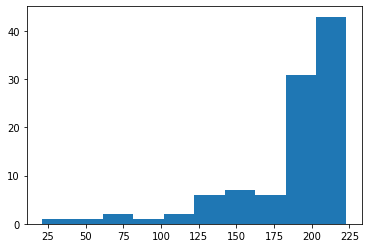

In [378]:
plt.hist(np.sum((coefs_lasso<0.0001) & (coefs_lasso>-0.0001),axis=1))

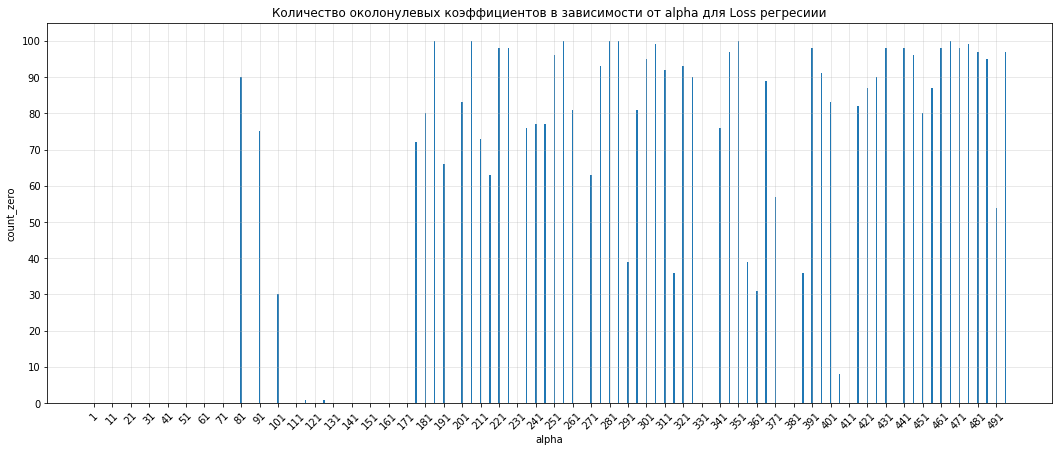

In [363]:
fsize = (18, 7)
fig, ax = plt.subplots(figsize=fsize)    
plt.xticks(range(1,496,10), rotation=45)
plt.yticks(range(0,120,10))
plt.grid(alpha=0.35)
plt.title('Количество околонулевых коэффициентов в зависимости от alpha для Loss регресиии')
plt.xlabel('alpha')
plt.ylabel('count_zero')
plt.bar(df_coefs_lasso_count_zero['alpha'],df_coefs_lasso_count_zero['count_zero'],align='center');

??? На практике как понять что выбрать, Лассо или Ридж? Только попробовав то и другое? Для каждых входных данный будет свой выбор?

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, на которой будет показана значение коэффициентов для каждого признака. График должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

In [304]:
from sklearn.linear_model import LassoCV

??? Почему на лекциях было alphas = np.linspace(0.001, 50, 500)? Потому что заранее было ясно что дальше MSE будет только расти?

In [388]:
#alphas = np.linspace(0.001, 50, 500)
alphas = np.arange(1, 300, 2) #Опытным путев выбрал этот диапазон
lasso_cv = LassoCV(alphas=alphas, random_state=42,cv=5)
lasso_cv.fit(X, y)

/home/denis/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25155976863.699036, tolerance: 764860686.122989
  tol, rng, random, positive)
/home/denis/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55685247306.850525, tolerance: 764860686.122989
  tol, rng, random, positive)
/home/denis/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149936532104.73224, tolerance: 764860686.122989
  tol, rng, random, positive)
/home/denis/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/_coordin

LassoCV(alphas=array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191...
       209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233,
       235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259,
       261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285,
       287, 289, 291, 293, 295, 297, 299]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=42, se

alpha = 57


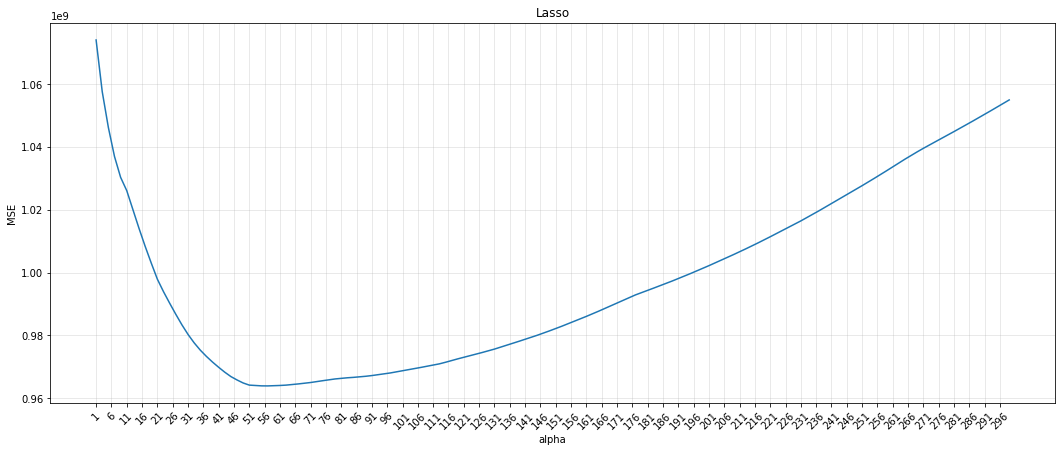

In [389]:
mean_mse = np.mean(lasso_cv.mse_path_, axis = 1) # Берем среднюю ошибку на всех фолдах при каждом альфа

fsize = (18, 7)
fig, ax = plt.subplots(figsize=fsize)    
plt.xticks(range(1,300,5), rotation=45)
plt.grid(alpha=0.35)
plt.plot(lasso_cv.alphas_, mean_mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso')
print('alpha = {}'.format(lasso_cv.alpha_))

In [390]:
lasso_cv.alpha_

57

??? На сколько большая MSE? 10 в +9 степений

??? Третья степень для коэффициентов не большая?

In [391]:
lasso_cv.coef_

array([-1.36006732e+02,  4.28025929e-01,  7.74967553e+03,  5.66507439e+03,
        2.79895142e+02,  7.56088617e+01,  2.05896277e+01,  2.18046088e+01,
        1.48096853e+01,  7.90112999e+00,  5.08854652e+00,  4.16511618e+01,
        5.22892687e+01,  6.83347428e+00,  6.51532515e+00,  2.40592096e+03,
       -0.00000000e+00,  3.87297448e+03,  1.04658357e+03, -3.84750009e+03,
       -1.12494711e+04,  1.75204717e+03,  3.02158548e+03,  2.83686332e+00,
        5.88908824e+03,  1.25418601e+01,  1.40643715e+01,  3.08696246e+00,
        2.25103845e+00,  2.73524656e+01,  3.49279127e+01,  7.30750631e+01,
       -6.71258345e-01, -3.61026283e+02, -1.46392375e+02, -1.50945300e+04,
        3.16226019e+03,  0.00000000e+00,  1.03944009e+03, -3.30332024e+03,
       -7.69490265e+03,  4.62712206e-11, -1.02847123e+03,  1.87838637e+03,
       -0.00000000e+00,  0.00000000e+00, -4.11326537e+03,  5.12031667e+03,
       -1.70690057e+03,  3.33214989e+03,  0.00000000e+00, -0.00000000e+00,
        4.63805171e+02,  

Магнитуда признаков

In [392]:
coef = pd.DataFrame(list(zip(np.round(lasso_cv.coef_, 2), df_dum.columns)))
coef.columns = ['weight', 'feature']
coef = coef.reindex(coef.weight.abs().sort_values(ascending=False).index) # Сортирую значения по возрастанию веса по модулю, по сути перестраиваю датафрейм по новым индексам
coef

,weight,feature
121,-500404.07,RoofStyle_Shed
98,-163442.73,Condition2_PosA
128,55348.20,RoofMatl_WdShake
82,39058.14,Neighborhood_Somerst
75,36677.81,Neighborhood_NWAmes
228,24033.37,Electrical_unknown
76,23796.82,Neighborhood_NoRidge
66,18935.86,Neighborhood_CollgCr
165,18243.46,MasVnrType_unknown
180,16529.48,Foundation_Wood


In [385]:
coef[abs(coef['weight'])!=0]

,weight,feature
121,-502885.45,RoofStyle_Shed
98,-164415.04,Condition2_PosA
128,55546.03,RoofMatl_WdShake
82,39097.43,Neighborhood_Somerst
75,36671.52,Neighborhood_NWAmes
228,23989.52,Electrical_unknown
76,23795.13,Neighborhood_NoRidge
66,18941.88,Neighborhood_CollgCr
165,18282.61,MasVnrType_unknown
180,16467.61,Foundation_Wood


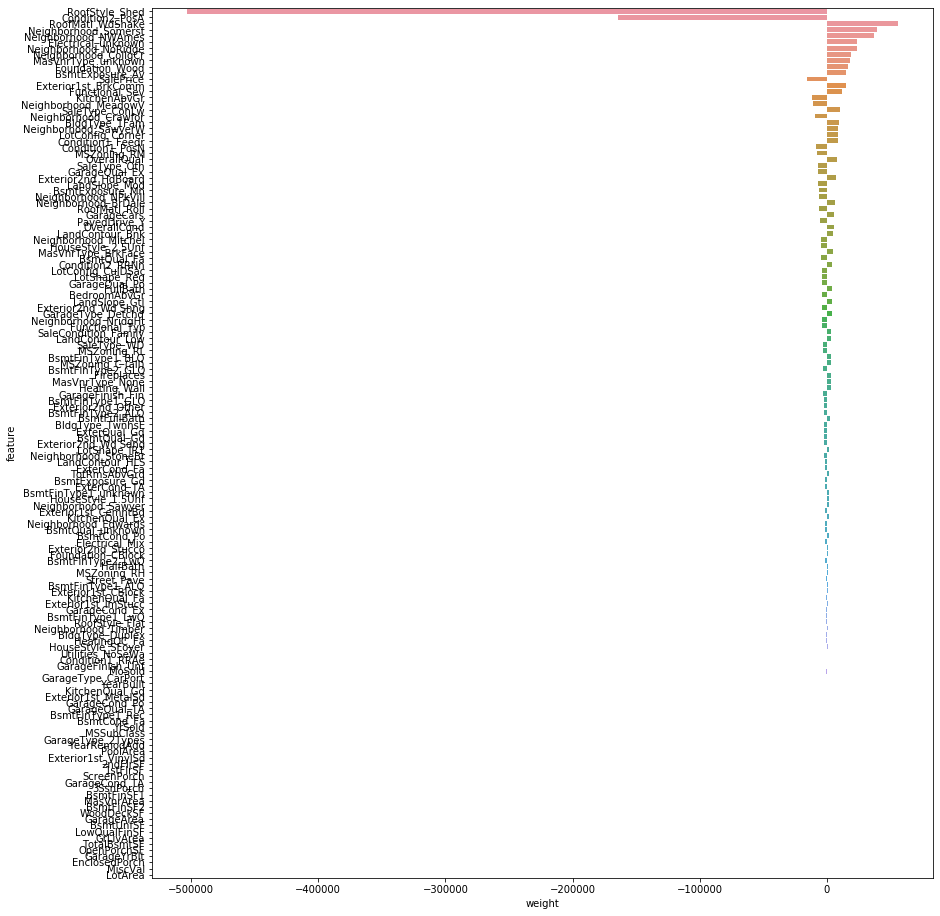

In [384]:
# Магнитуда признаков
plt.figure(figsize=(14,16))
sns.barplot(y='feature', x='weight',data=coef[abs(coef['weight'])!=0])
pass

In [393]:
#Количество не нулевых признаков
coef[abs(coef['weight'])!=0]['feature'].count()

140

??? А если для каждого альфа свой лучший набор признаков, то возможно можно как то отобрать лучшие признаки на на каждом альфа и как то это использовать? Например создав новые фичи.

Оценка модели на лучшем альфа:

In [394]:
cv = 5 # проведем 5 экспериментов
#errors = cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=cv, scoring='neg_mean_absolute_error')
errors = cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=cv, scoring='neg_mean_squared_error')
print(errors)
error = abs(np.mean(errors))
print("error={:0.3f}, std={:0.4f}".format(error, np.std(errors)))

[-5.11481033e+08 -1.90840019e+09 -7.83161771e+08 -1.11425784e+09
 -5.02291991e+08]
error=963918564.359, std=522516845.5644


??? Большая ошибка, большое отклонение, не стабильные показания модели? Что можно сделать, чтобы было лучше?

??? Почему не одно и тоже?

In [395]:
df_mse_path = pd.DataFrame(zip(lasso_cv.mse_path_,alphas))
df_mse_path[df_mse_path[1]==lasso_cv.alpha_]

,0,1
28,"[538619507.9563187, 1989583788.7295299, 987438...",57


In [317]:
list(df_mse_path[df_mse_path[1]==lasso_cv.alpha_][0])

[array([8.64617921e+08, 7.40260244e+08, 2.53599735e+09, 9.44451577e+08,
        4.18735858e+08])]

In [318]:
#MAE
np.sqrt(list(df_mse_path[df_mse_path[1]==lasso_cv.alpha_][0]))

array([[29404.38607822, 27207.72397008, 50358.68692823, 30731.93090505,
        20463.03637286]])

??? Ошибка 18% от средней цены?

In [326]:
print("Доля ошибок: {:.2%}".format(((np.sqrt(error) / y.mean()))))

Доля ошибок: 18.30%


Показатели простой линейной регрессии:

error = 647292292612899803190569110381527040.000 
  
  std = 869273701606008665609103159041458176.0000

## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X.shape

(1460, 280)

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [397]:
print('train: {}, test: {}'.format(X_train.shape,X_test.shape))

train: (978, 280), test: (482, 280)


Теперь, самую мощную на ваш взгляд модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`. Под моделью мы понимаем не только сами регрессоры, но и переданные при создании параметры.

In [398]:
reg = Lasso(lasso_cv.alpha_)
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

In [399]:
from sklearn.metrics import mean_squared_error

# Построим таблицу предсказание / оригинальное значение / MSE / MAE
prediction = pd.DataFrame(np.vstack((pred, y_test)).T, columns=["pred", "target"])
prediction['MSE'] = np.power(prediction['pred'] - prediction['target'], 2)
prediction['MAE'] = np.abs(prediction['pred'] - prediction['target'])
prediction['MAE%'] = round((prediction['MAE']/prediction['target'])*100,2)

In [400]:
# Сортируем по убыванию ошибки
prediction.sort_values(by='MAE', ascending=False, inplace=True)
prediction.head()

,pred,target,MSE,MAE,MAE%
415,501219.152452,745000.0,5.942910e+10,243780.847548,32.72
17,298964.167799,168500.0,1.702090e+10,130464.167799,77.43
236,402407.690728,278000.0,1.547727e+10,124407.690728,44.75
421,279262.615314,392000.0,1.270972e+10,112737.384686,28.76
464,446581.992929,555000.0,1.175446e+10,108418.007071,19.53


In [401]:
prediction.describe()

,pred,target,MSE,MAE,MAE%
count,482.000000,482.000000,4.820000e+02,482.000000,482.000000
mean,177354.823360,175726.143154,6.354191e+08,15784.847980,9.347054
std,73924.263716,78413.076967,3.105627e+09,19673.857799,9.539233
min,29260.615282,35311.000000,5.829828e+02,24.145036,0.010000
25%,129184.166335,127500.000000,2.643231e+07,5141.204336,3.190000
50%,163894.982259,158000.000000,1.171441e+08,10823.292729,6.635000
75%,211129.897403,206750.000000,4.166079e+08,20410.967278,12.090000
max,501219.152452,745000.000000,5.942910e+10,243780.847548,77.430000


Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены вдоль прямой `y = x` с некоторым разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

In [177]:
y_test.shape

(482,)

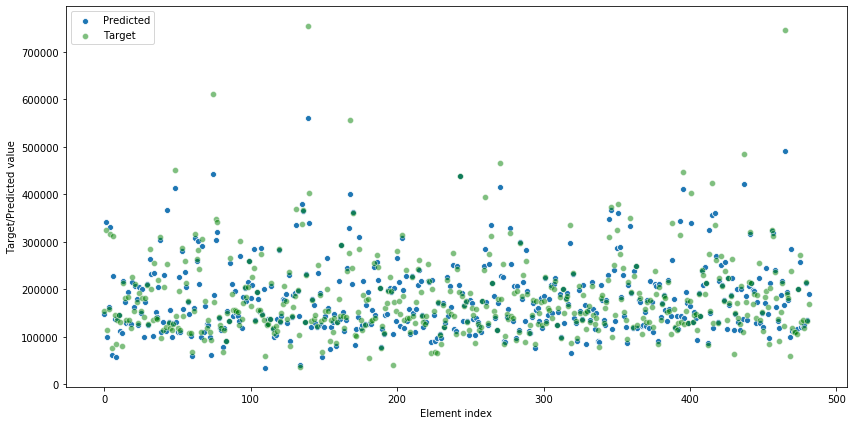

In [184]:
plt.figure(figsize=(14,7))

sns.scatterplot(range(0, pred.shape[0]), pred)
sns.scatterplot(range(0, y_test.shape[0]), y_test,color='g', alpha=0.5)
#plt.plot(range(0, prediction.shape[0]), prediction['target'])
#plt.plot(range(0, prediction.shape[0]), prediction['MAE'])
plt.legend(["Predicted", "Target"])

plt.xlabel("Element index")
plt.ylabel("Target/Predicted value")
pass

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы составили датасет с очень малым количеством полезных признаков в соответствии с heatmap? Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот датасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [190]:
columns_gt_threshold

['SalePrice',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [186]:
XX = df_dum[columns_gt_threshold].drop(['SalePrice'], axis=1)
yy = df_dum['SalePrice']

In [402]:
cv = 5 # проведем 5 экспериментов
eerrors = cross_val_score(Lasso(1), XX, yy, cv=cv, scoring='neg_mean_squared_error')
print(errors)
error = abs(np.mean(errors))
print("error={:0.3f}, std={:0.4f}".format(error, np.std(errors)))

[-5.11481033e+08 -1.90840019e+09 -7.83161771e+08 -1.11425784e+09
 -5.02291991e+08]
error=963918564.359, std=522516845.5644


Распределение целевого признака после логарифмирования

In [197]:
#С делать логарифмирование к целевому признаку, чтобы убрать хвост
#Не забыть обратно вернуть, возвести в экспоненту, после предсказания, когда будем проверять реультат.
#pipline + дата трансформаторы

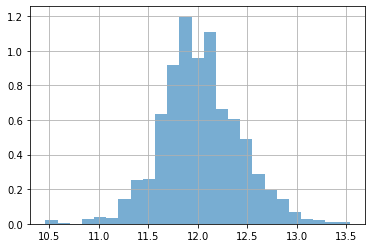

In [14]:
np.log(df.SalePrice).hist(bins=25, density=True, alpha=0.6)

10.306530562188488 13.688184574233194


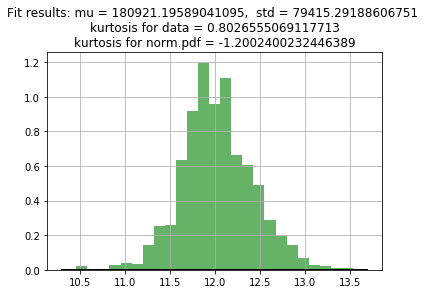

In [15]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df.SalePrice) #Математическое ожидание и стандартное отклонение

# Plot the histogram.
np.log(df.SalePrice).hist(bins=25, density=True, alpha=0.6, color='g')
#distplot+

# Plot the PDF.
xmin, xmax = plt.xlim()
print(xmin, xmax )
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = {},  std = {} \nkurtosis for data = {}\nkurtosis for norm.pdf = {}".format(mu, std,kurtosis(np.log(df.SalePrice)),kurtosis(p))
plt.title(title)

plt.show()

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

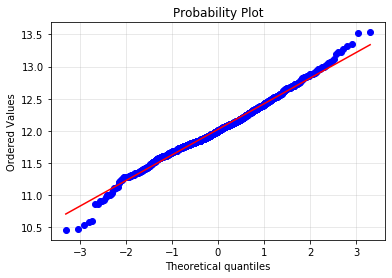

In [16]:
plt.grid(alpha=0.35)
probplot(np.log(df.SalePrice), plot=plt)

Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.